In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
X = df.drop('quality', axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Agglomerative (Hierarchical) Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_scaled)


In [5]:
print("KMeans Clustering:")
print(" - Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print(" - Davies-Bouldin Index:", davies_bouldin_score(X_scaled, kmeans_labels))

print("\nAgglomerative Clustering:")
print(" - Silhouette Score:", silhouette_score(X_scaled, agg_labels))
print(" - Davies-Bouldin Index:", davies_bouldin_score(X_scaled, agg_labels))


KMeans Clustering:
 - Silhouette Score: 0.1892040681108649
 - Davies-Bouldin Index: 1.7672646013879965

Agglomerative Clustering:
 - Silhouette Score: 0.15774678821176108
 - Davies-Bouldin Index: 1.9731118231976292


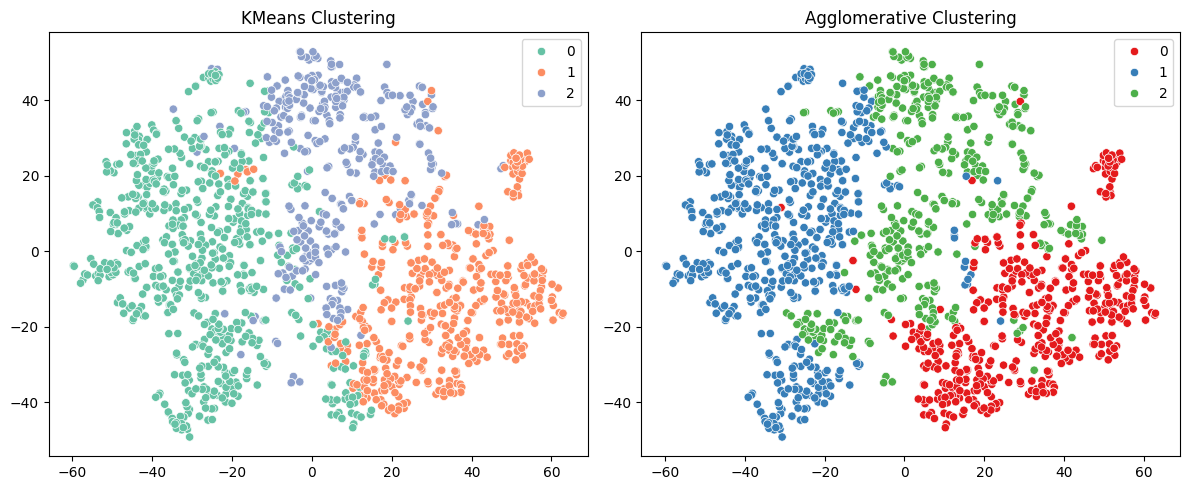

In [6]:
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=kmeans_labels, palette="Set2")
plt.title("KMeans Clustering")

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=agg_labels, palette="Set1")
plt.title("Agglomerative Clustering")

plt.tight_layout()
plt.show()


In [7]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)


In [8]:
autoencoder = MLPRegressor(hidden_layer_sizes=(8, 5, 8), max_iter=500, random_state=42)
autoencoder.fit(X_scaled, X_scaled)
X_autoencoded = autoencoder.predict(X_scaled)


In [9]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

clf_pca = LogisticRegression(max_iter=500)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)


In [10]:
X_train_ae, X_test_ae, _, _ = train_test_split(X_autoencoded, y, test_size=0.2, random_state=42)

clf_ae = LogisticRegression(max_iter=500)
clf_ae.fit(X_train_ae, y_train)
y_pred_ae = clf_ae.predict(X_test_ae)

acc_ae = accuracy_score(y_test, y_pred_ae)


In [11]:
print(f"\nAccuracy using PCA features: {acc_pca:.4f}")
print(f"Accuracy using Autoencoder features: {acc_ae:.4f}")


Accuracy using PCA features: 0.5375
Accuracy using Autoencoder features: 0.5531
